## STL

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
airline = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/airline_passengers.csv',index_col='Month',parse_dates=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


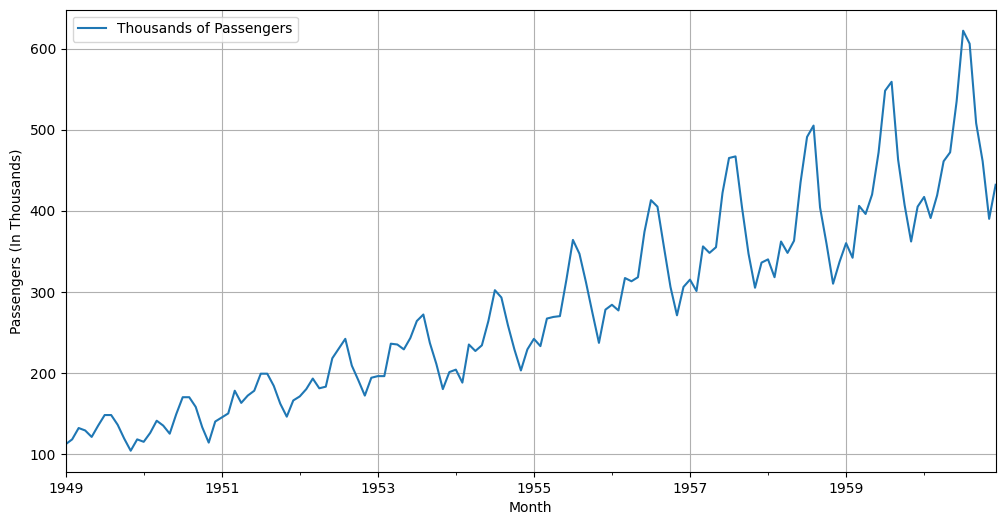

In [30]:
airline.plot(figsize = (12, 6), ylabel = 'Passengers (In Thousands)');
plt.grid()

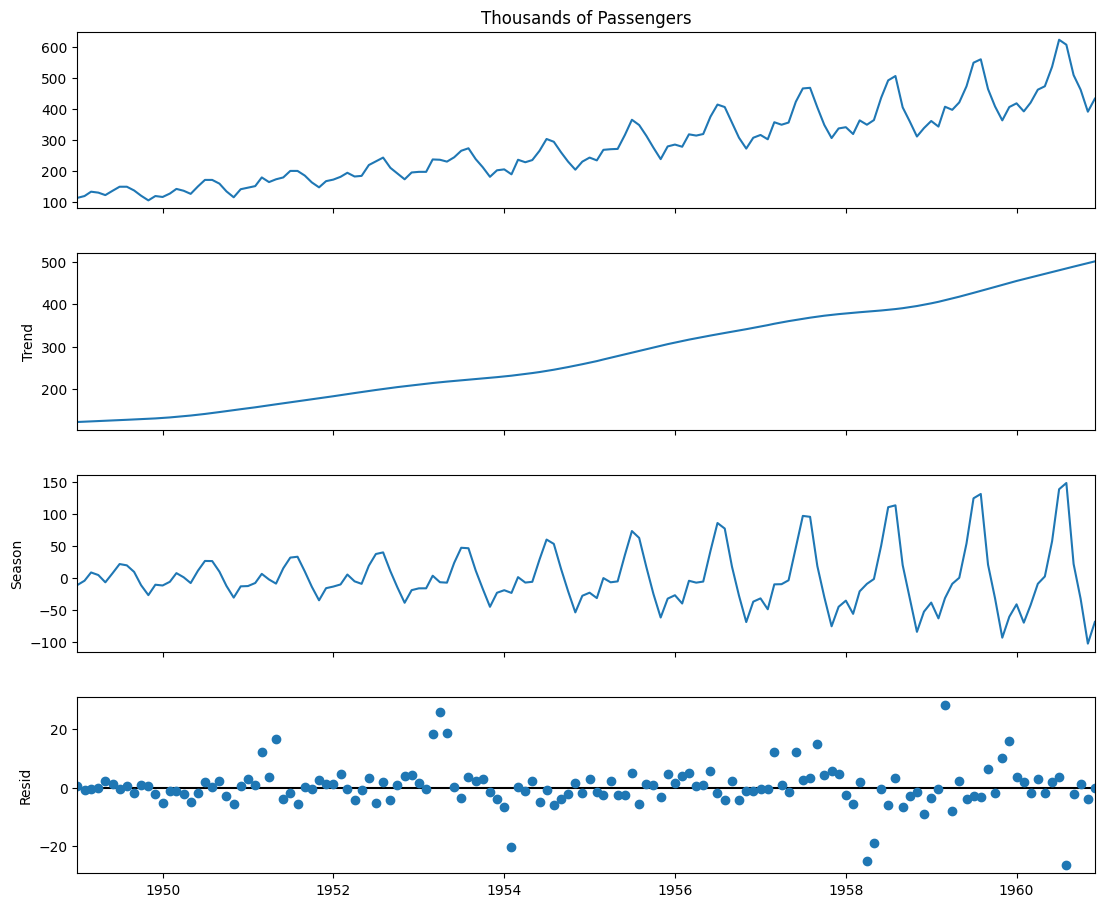

In [31]:
from statsmodels.tsa.seasonal import STL

stl = STL(airline["Thousands of Passengers"], period = 12, robust = True)  # Robust = better handling of outliers
decomp_stl = stl.fit()

# Increase figure size
fig = decomp_stl.plot();
fig.set_size_inches(12, 10)  # Width = 12 inches, Height = 8 inches
plt.show()

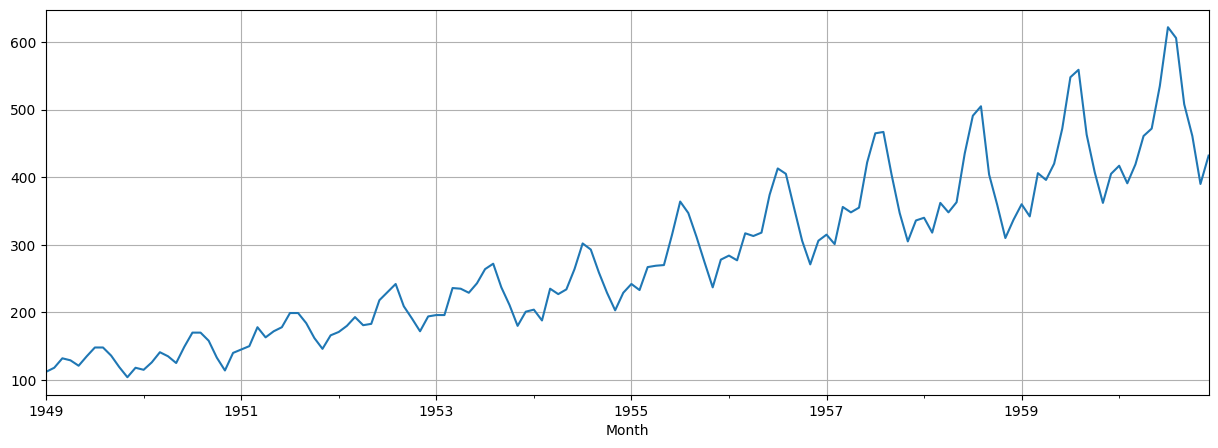

In [32]:
# Individual Graphs (Observed)

decomp_stl.observed.plot(figsize = (15,5))
plt.grid()
plt.show()

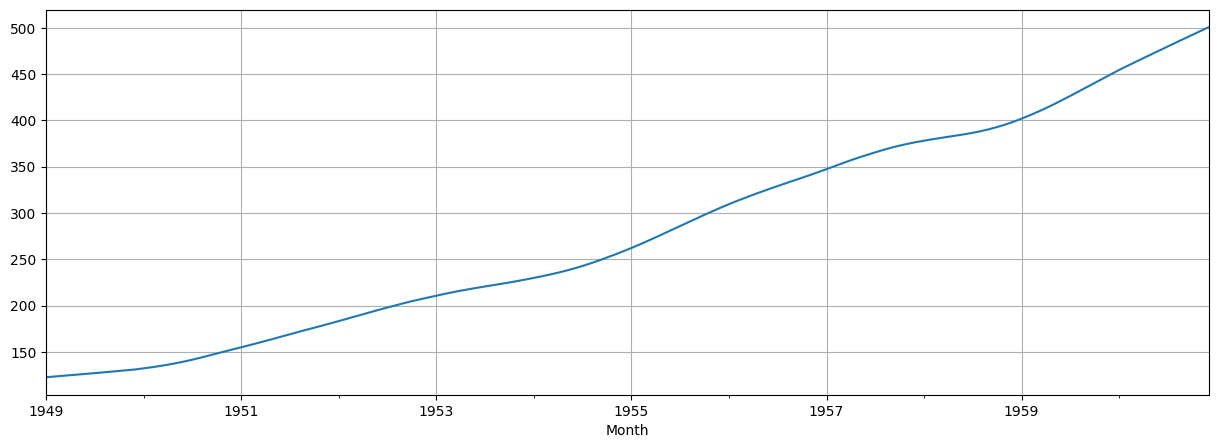

In [33]:
# Individual Graphs (Trend)

decomp_stl.trend.plot(figsize = (15,5))
plt.grid()
plt.show()

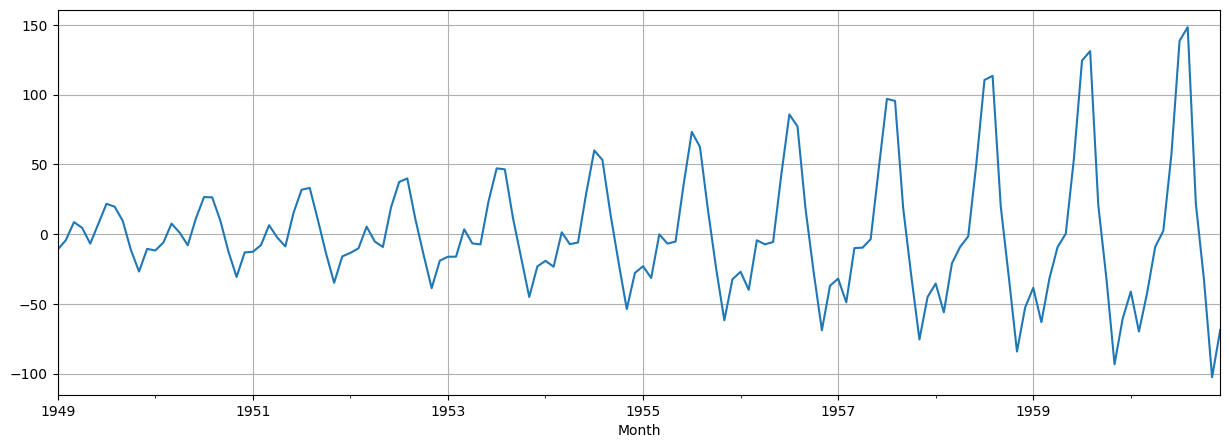

In [34]:
# Individual Graphs (Seasonal)

decomp_stl.seasonal.plot(figsize = (15,5))
plt.grid()
plt.show()

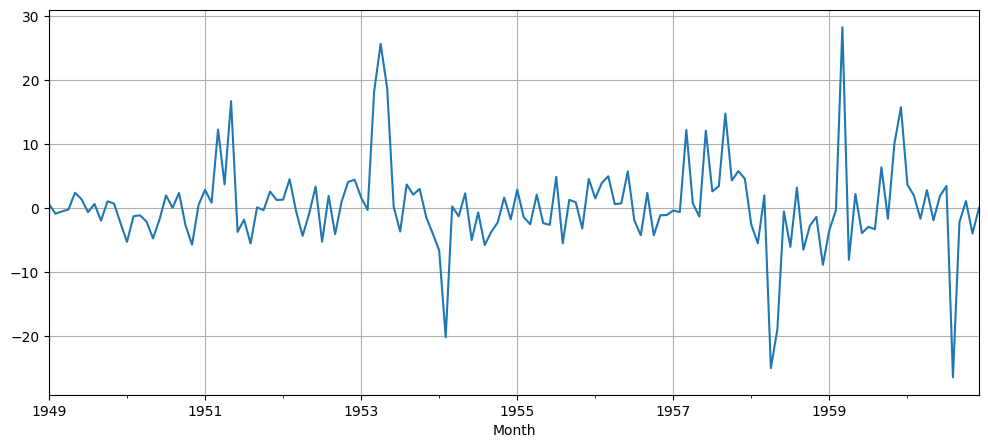

In [35]:
# Individual Graphs (Residual/Error)

decomp_stl.resid.plot(figsize = (12,5))
plt.grid()
plt.show()

# Comparative Graphs

In [36]:
# Apply ETS Decomposition (Additive Model)

from statsmodels.tsa.seasonal import seasonal_decompose

decomp_ets = seasonal_decompose(airline["Thousands of Passengers"], model="multiplicative", period=12)

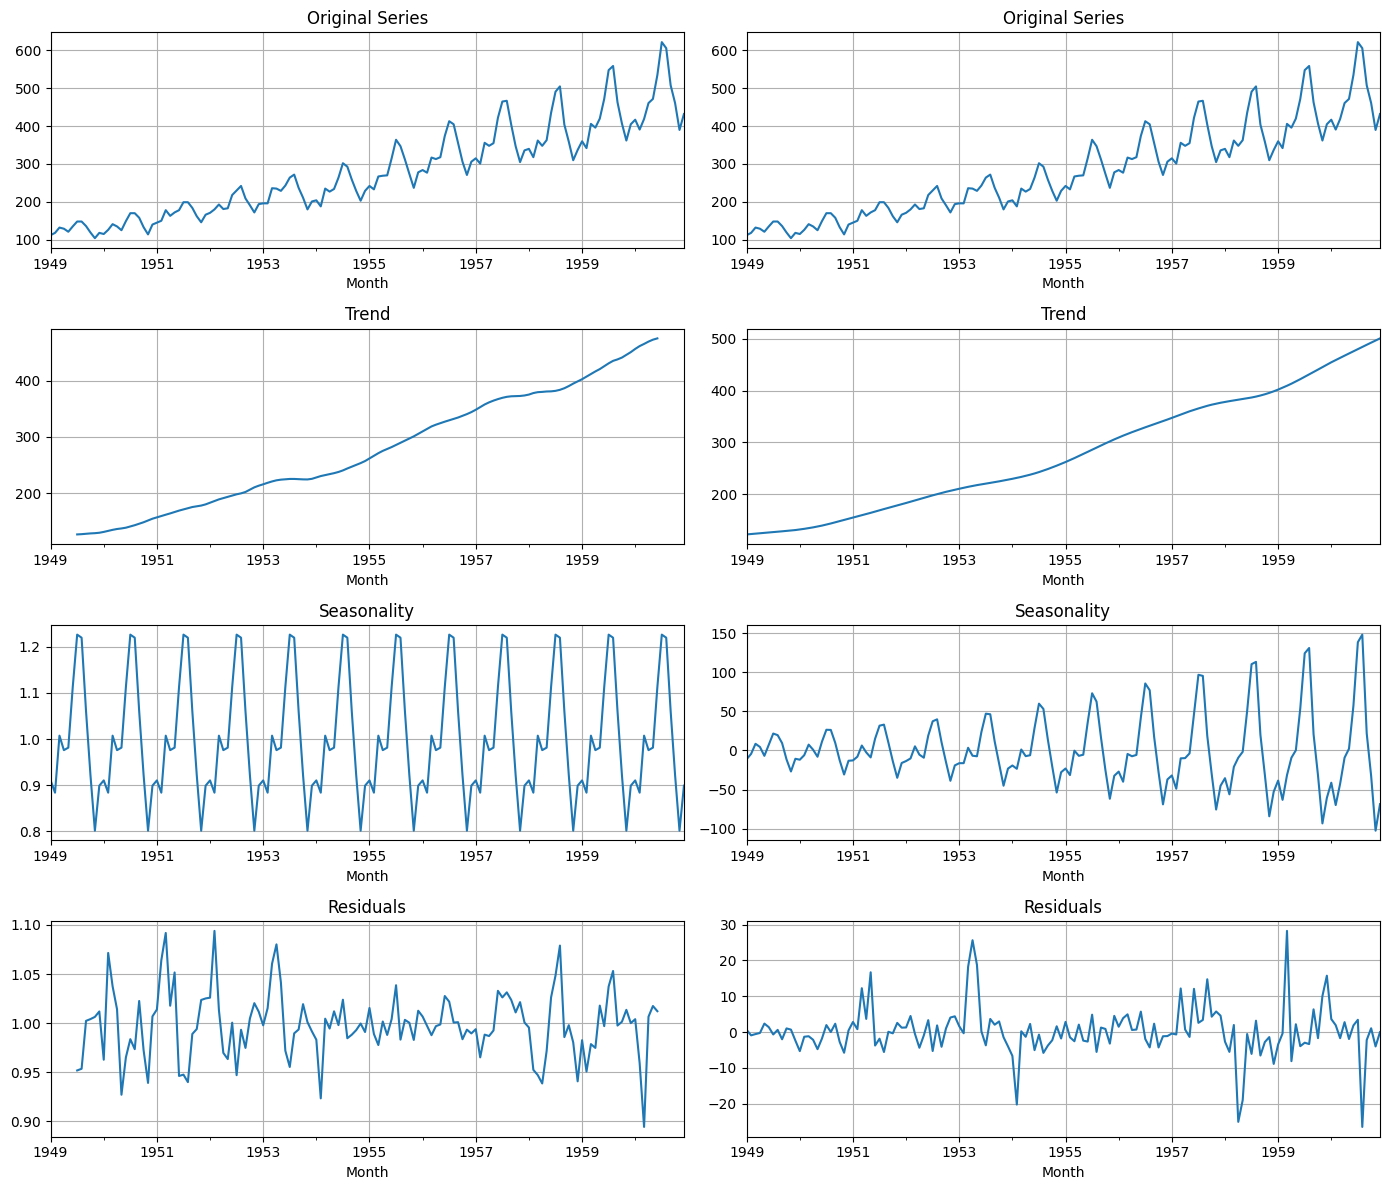

In [37]:
# Side by Side Comparisons

# Plot ETS and STL Decomposition Side-by-Side
fig, axes = plt.subplots(4, 2, figsize=(14, 12))

# Titles for both models
titles = ["Original Series", "Trend", "Seasonality", "Residuals"]

# Plot ETS Decomposition (Left/Side)
components_ets = [airline["Thousands of Passengers"], decomp_ets.trend, decomp_ets.seasonal, decomp_ets.resid]
for i, component in enumerate(components_ets):

    component.plot(ax = axes[i, 0], title = titles[i])
    axes[i, 0].grid()

# Plot STL Decomposition (Right/Side)
components_stl = [airline["Thousands of Passengers"], decomp_stl.trend, decomp_stl.seasonal, decomp_stl.resid]
for i, component in enumerate(components_stl):

    component.plot(ax = axes[i, 1], title = titles[i])
    axes[i, 1].grid()

plt.tight_layout()
plt.show()
